<a href="https://colab.research.google.com/github/najlaa-jolha/GRIP/blob/main/1st_task_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict using Supervised ML**

***Task 1: predicting the percentage of an student based on the number of study hours***

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Hours     0
Scores    0
dtype: int64


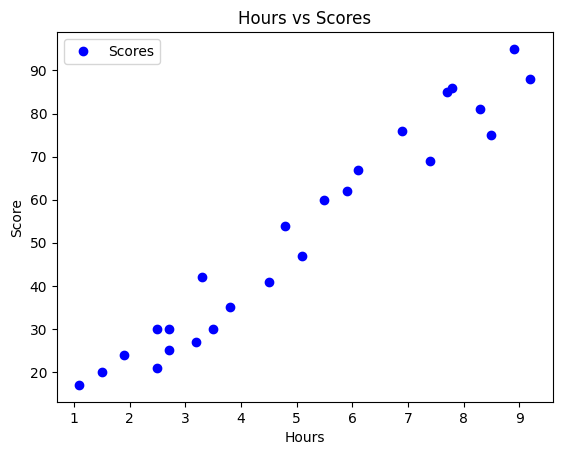

In [4]:
# Visualization
df.plot(x='Hours', y='Scores', style='bo')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [5]:
# Preprocessing data
X = df.drop('Scores', axis=1)  # Attributes
y = df['Scores']  # Labels

In [7]:
print(X)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [8]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [9]:
print(y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [10]:
print(type(y))

<class 'pandas.core.series.Series'>


In [11]:
X=X.to_numpy()
y=y.to_numpy()

In [12]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [13]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)


In [14]:
# Training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

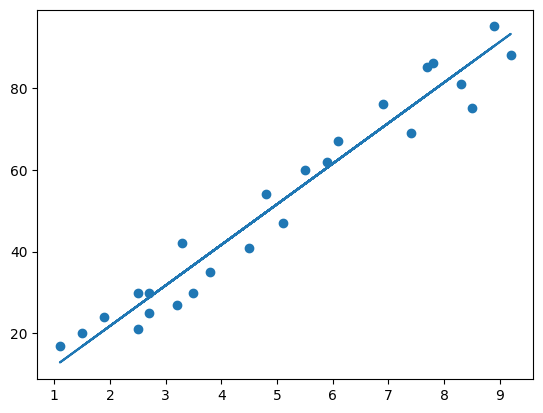

In [15]:
# Plotting the regression line
lr_line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, lr_line);
plt.show()

In [16]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
# test with my score
hours = [9.25]
hours = pd.DataFrame([hours], columns=['Hours'])
own = lr.predict(hours)
print("Number of Hours = {}".format(9.25))
print("My Score = {}".format(own[0]))

Number of Hours = 9.25
My Score = 93.69173248737539


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [27]:
# Evaluation metrics
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error

print ('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
